In [142]:
import sys
import os
from TotalCalculation import *
from preprocessing import *
import os
from datetime import datetime as dt
from ConstructDatatset import Builddataset

In [2]:
filename = image.getFilename(path=r'C:\Users\ASUS\Documents\NARIT_internship_data\All_sky_camera_Astropark_Chaingmai\2024-06\2024-06-21')
img = [cv2.cvtColor(cv2.imread(f),cv2.COLOR_BGR2RGB) for f in filename]
print(filename)

['C:\\Users\\ASUS\\Documents\\NARIT_internship_data\\All_sky_camera_Astropark_Chaingmai\\2024-06\\2024-06-21\\638544996168477285.png', 'C:\\Users\\ASUS\\Documents\\NARIT_internship_data\\All_sky_camera_Astropark_Chaingmai\\2024-06\\2024-06-21\\638544998169161678.png', 'C:\\Users\\ASUS\\Documents\\NARIT_internship_data\\All_sky_camera_Astropark_Chaingmai\\2024-06\\2024-06-21\\638545000169737274.png', 'C:\\Users\\ASUS\\Documents\\NARIT_internship_data\\All_sky_camera_Astropark_Chaingmai\\2024-06\\2024-06-21\\638545002070021119.png', 'C:\\Users\\ASUS\\Documents\\NARIT_internship_data\\All_sky_camera_Astropark_Chaingmai\\2024-06\\2024-06-21\\638545003870327105.png', 'C:\\Users\\ASUS\\Documents\\NARIT_internship_data\\All_sky_camera_Astropark_Chaingmai\\2024-06\\2024-06-21\\638545005770362518.png', 'C:\\Users\\ASUS\\Documents\\NARIT_internship_data\\All_sky_camera_Astropark_Chaingmai\\2024-06\\2024-06-21\\638545007770911155.png', 'C:\\Users\\ASUS\\Documents\\NARIT_internship_data\\All_sky_c

In [3]:
filetime = []
extract_name = lambda x : int(os.path.splitext(os.path.basename(x))[0])
filetime = [extract_name(i) for i in filename]
decimal = [timeConvertion().datetime_to_decimal(time=timeConvertion().ticks_to_datetime(ticks=t,time_zone=7)) for t in filetime]
print(decimal)

[0.0044444444444444444, 0.060000000000000005, 0.11555555555555556, 0.1686111111111111, 0.21861111111111112, 0.2713888888888889, 0.3269444444444444, 0.3797222222222222, 0.4352777777777778, 0.4880555555555556, 0.5408333333333333, 0.596388888888889, 0.6547222222222222, 0.7269444444444445, 0.8019444444444445, 0.8769444444444445, 0.9519444444444444, 1.0269444444444444, 1.1019444444444446, 1.1769444444444446, 1.2519444444444445, 1.3269444444444445, 1.3991666666666667, 1.471388888888889, 1.5408333333333333, 1.6105555555555557, 1.6827777777777777, 1.7522222222222221, 1.8161111111111112, 1.8855555555555554, 1.952222222222222, 2.0244444444444443, 2.093888888888889, 2.1688888888888886, 2.2466666666666666, 2.3216666666666663, 2.3966666666666665, 2.4716666666666667, 2.5466666666666664, 2.6216666666666666, 2.6966666666666668, 2.7716666666666665, 2.8466666666666667, 2.924444444444444, 2.9994444444444444, 3.0744444444444445, 3.1494444444444443, 3.2247222222222223, 3.299722222222222, 3.374722222222222,

In [4]:
decimal = []
for i in filetime:    
    t = timeConvertion().ticks_to_datetime(ticks=i,time_zone=7)
    decimal.append(timeConvertion().datetime_to_decimal(time=t))

In [5]:
start_date = str(dt(t.year,1,1).date())
sunrise,sunset = SunPosition().SunriseSunset(location=[18.849417,98.9538],Time_zone=7,filename=filetime[7],start_date=start_date,include_end_date=True)
print(sunrise,sunset)

5.863020620227611 18.998388995225024


In [6]:
filtering = lambda x : (x > sunrise) & (x < sunset)
day_indices = [index for index, value in enumerate(decimal) if filtering(value)]
night_indices = [index for index, value in enumerate(decimal) if not filtering(value)]

In [7]:
Day_filename = [filename[i] for i in day_indices]
night_filename = [filename[i] for i in night_indices]

In [8]:
Day_filename,night_filename = image.extract_filename(filename=filename,sunrise=sunrise,sunset=sunset,time_zone=7)

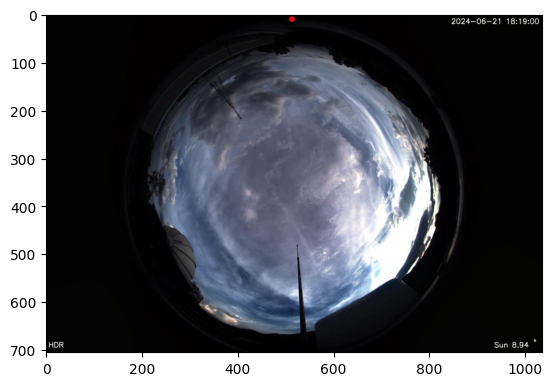

In [9]:
import cv2
from matplotlib import pyplot as plt
im = 325
images = []
images = [cv2.imread(i) for i in Day_filename]
images = [cv2.cvtColor(i,cv2.COLOR_BGR2RGB) for i in images]
plt.imshow(images[im])

In [10]:
crop_image = [preprocessData().crop_center(img=i,crop_size=570) for i in images]
Blue = [cv2.split(i)[2] for i in crop_image]
skewness = [preprocessData().calculate_skewness(data=B) for B in Blue]

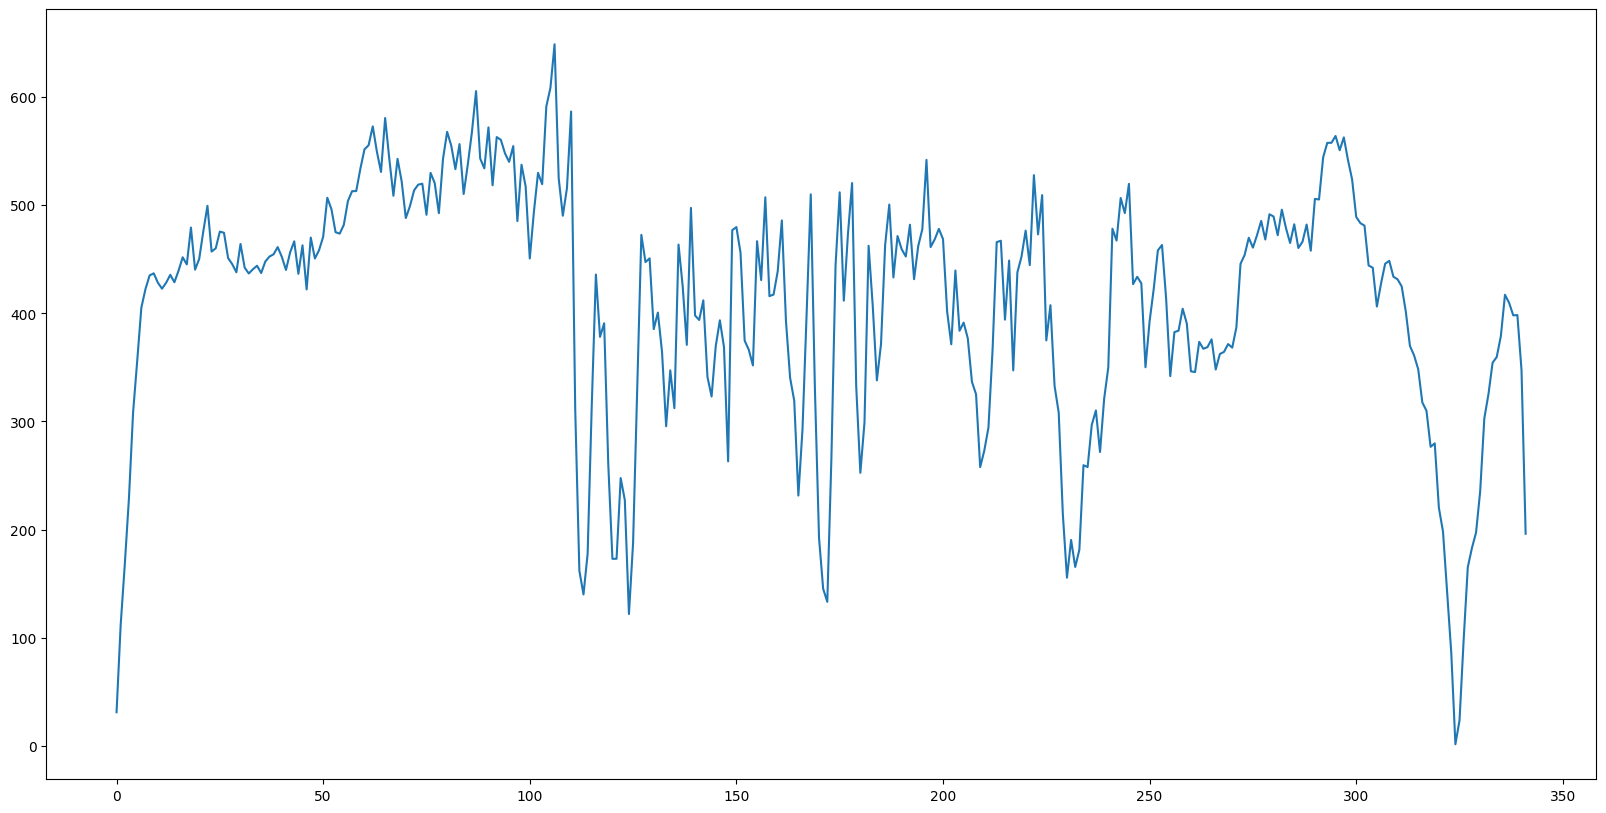

In [11]:
plt.figure(figsize=(20,10))
plt.plot(skewness)

In [12]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.preprocessing import StandardScaler
df = pd.read_csv(r'C:\Users\ASUS\Documents\NARIT_internship_data\Output_HTML\Astropark\Astropark_Output.csv')

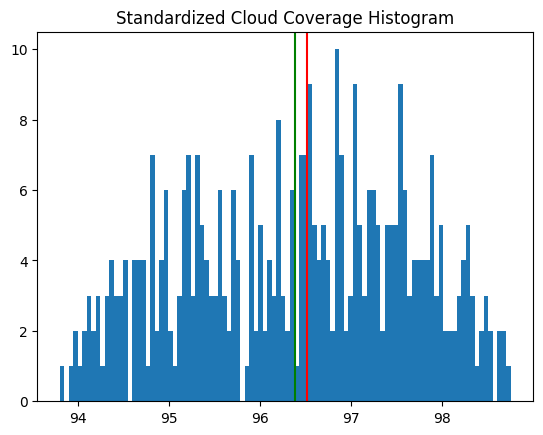

Mean :  Cloud_coverage %    96.387873
dtype: float64


c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [13]:
std = StandardScaler()
clarity = df[['Cloud_coverage %']]
x = np.array(std.fit_transform(clarity)).reshape(-1, 1)

# Plot histogram of the standardized data
plt.hist(x=np.array(clarity), bins=100)
plt.axvline(np.median(np.array(clarity)),c='r')
plt.axvline(np.mean(np.array(clarity)),c='g')
plt.title('Standardized Cloud Coverage Histogram')
plt.show()

print("Mean : ", np.mean(clarity))


In [14]:
df["Cloud_coverage %"].describe()

count    373.000000
mean      96.387873
std        1.236955
min       93.802802
25%       95.331114
50%       96.515842
75%       97.397938
max       98.750978
Name: Cloud_coverage %, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1fc0062eb90>,
 'caps': [<matplotlib.lines.Line2D at 0x1fc0062f0d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fc0062e8f0>],
 'medians': [<matplotlib.lines.Line2D at 0x1fc0062f610>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fc0062f8b0>],
 'means': []}

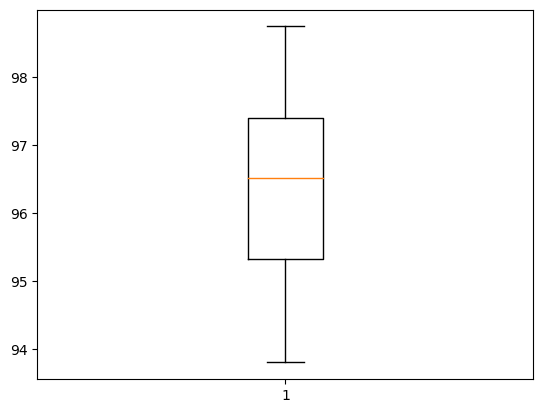

In [15]:
plt.boxplot(df['Cloud_coverage %'])

In [16]:
import pickle 

with open(r'C:\Users\ASUS\Documents\NARIT_internship_2024\NARIT_internship_2024\models\PCA\PCA_2.pkl','rb') as pca:
    PCA = pickle.load(pca)
with open(r'C:\Users\ASUS\Documents\NARIT_internship_2024\NARIT_internship_2024\models\Scaler\StandardScaler.pkl','rb') as scaler:
    Scaler = pickle.load(scaler)
with open(r'C:\Users\ASUS\Documents\NARIT_internship_2024\NARIT_internship_2024\models\kmean_model_2PCA.pkl','rb') as kmean:
    Kmean = pickle.load(kmean)

In [17]:
import pandas as pd
import numpy as np

output = pd.read_csv(r'C:\Users\ASUS\Documents\NARIT_internship_data\Output_HTML\Astropark\Astropark_Output.csv')

In [18]:
values = pd.value_counts(output['Kmean_clustering'])
print("Different classes : ",np.unique(output['Kmean_clustering']))
print("Each class count : ",values)
print("percentage for each class : ",values/len(output))

Different classes :  [2]
Each class count :  2    373
Name: Kmean_clustering, dtype: int64
percentage for each class :  2    1.0
Name: Kmean_clustering, dtype: float64


In [19]:
values = pd.value_counts(output['GMM_model'])
print("Different classes : ",np.unique(output['GMM_model']))
print("Each class count : ",values)
print("percentage for each class : ",values/len(output))

Different classes :  [1]
Each class count :  1    373
Name: GMM_model, dtype: int64
percentage for each class :  1    1.0
Name: GMM_model, dtype: float64


In [40]:
df1 = Builddataset().concateDataset(folder_name = r'C:\Users\ASUS\Documents\NARIT_internship_data\Categorical\GLCM_1,0')
df2 = Builddataset().concateDataset(folder_name = r'C:\Users\ASUS\Documents\NARIT_internship_data\Categorical\GLCM_2,0')
df3 = Builddataset().concateDataset(folder_name = r'C:\Users\ASUS\Documents\NARIT_internship_data\Categorical\GLCM_3,0')
df4 = Builddataset().concateDataset(folder_name = r'C:\Users\ASUS\Documents\NARIT_internship_data\Categorical\GLCM_4,0')
df5 = Builddataset().concateDataset(folder_name = r'C:\Users\ASUS\Documents\NARIT_internship_data\Categorical\GLCM_1,45')
df6 = Builddataset().concateDataset(folder_name = r'C:\Users\ASUS\Documents\NARIT_internship_data\Categorical\GLCM_2,45')
df7 = Builddataset().concateDataset(folder_name = r'C:\Users\ASUS\Documents\NARIT_internship_data\Categorical\GLCM_3,45')
df8 = Builddataset().concateDataset(folder_name = r'C:\Users\ASUS\Documents\NARIT_internship_data\Categorical\GLCM_4,45')
df = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8])

In [41]:
df

,contrast,dissimilarity,homogeneity,energy,correlation,ASM,intensity,Red channel,Blue channel,skewness,std,different(R-B),label
638529654113325820,127.297826,1.823464,0.731969,0.272523,0.982644,0.074269,92.453841,39.669760,92.453841,260.268095,77.628997,-52.784081,Clear
638529655313754106,139.675343,2.038079,0.702889,0.273775,0.981577,0.074953,88.668163,40.546337,88.668163,320.416404,76.435384,-48.121825,Clear
638531382127090396,72.928123,0.875738,0.848392,0.283339,0.989436,0.080281,94.289711,37.473620,94.289711,230.225469,75.976251,-56.816091,Clear
638531383327998900,76.707600,0.910973,0.838897,0.283940,0.988965,0.080622,90.215731,38.907064,90.215731,291.223374,74.279374,-51.308667,Clear
638531384528879471,72.275738,0.929226,0.827281,0.283194,0.989582,0.080199,88.310465,39.799160,88.310465,318.210252,73.335230,-48.511305,Clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...
638552452925538933,967.732096,12.874730,0.425494,0.264472,0.895593,0.069946,77.561616,43.261296,77.561616,539.744239,78.912796,-34.300320,Partly cloudy
638552458328144744,1014.890873,13.572866,0.414859,0.246255,0.905225,0.060641,80.284081,45.052979,80.284081,536.826431,81.026898,-35.231102,Partly cloudy
638552461328475346,1011.537726,12.566976,0.457548,0.264899,0.895071,0.070172,76.766845,43.211570,76.766845,546.991421,79.184953,-33.555275,Partly cloudy
638552463129012533,980.755766,12.069507,0.459672,0.258764,0.907559,0.066959,90.886762,48.925611,90.886762,10.642213,67.723973,-41.961151,Partly cloudy


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import seaborn as sns
scaler = StandardScaler()
scaler.fit(df.drop(columns=['label']))
scaled = scaler.transform(df.drop(columns=['label']))
X = scaled
y = df['label']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [43]:
knn = KNeighborsClassifier(n_neighbors=5,weights='uniform',algorithm='auto',metric='minkowski')
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)
accuracy_score(y_test,y_pred_knn)

0.9038102851052492

<Figure size 2000x2000 with 0 Axes>

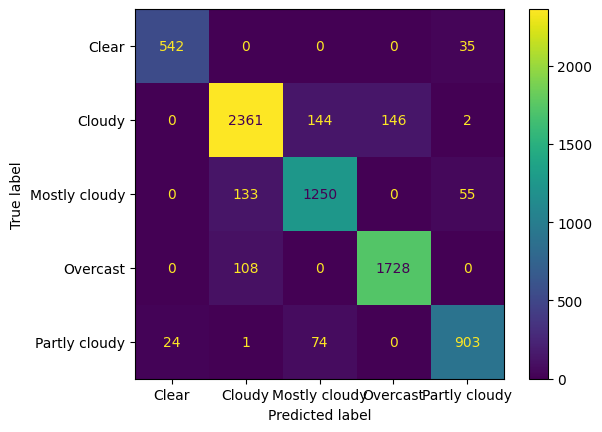

In [44]:
labels = ['Clear','Cloudy','Mostly cloudy','Overcast','Partly cloudy']
cm = confusion_matrix(y_test, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
plt.figure(figsize=(20,20))
disp.plot(cmap=plt.cm.viridis)
plt.show()

In [45]:
print(classification_report(y_test,y_pred_knn))

               precision    recall  f1-score   support

        Clear       0.96      0.94      0.95       577
       Cloudy       0.91      0.89      0.90      2653
Mostly cloudy       0.85      0.87      0.86      1438
     Overcast       0.92      0.94      0.93      1836
Partly cloudy       0.91      0.90      0.90      1002

     accuracy                           0.90      7506
    macro avg       0.91      0.91      0.91      7506
 weighted avg       0.90      0.90      0.90      7506



In [138]:
mask_path = r'C:\Users\ASUS\Documents\NARIT_internship_2024\NARIT_internship_2024\masks\mask_delete_5.png'
image_path = r'C:\Users\ASUS\Documents\NARIT_internship_data\All_sky_camera_Astropark_Chaingmai\2024-08\2024-08-07'
properties = ['contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation', 'ASM']
mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
mask = preprocessData().crop_center(mask, crop_size=570)
images,filename = preprocessData().load_images_and_preprocess(image_path,mask=mask,apply_crop_sun=True)
sunrise,sunset = SunPosition().SunriseSunset(filename=filename[50],location=[18.849417,98.9538],Time_zone=7,start_date=start_date,include_end_date=True)
masked,value,statisical = thresholding().RBratio(input=images,filename=filename,sunrise=sunrise,sunset=sunset,Time_zone=7)
gray = [cv2.cvtColor(i,cv2.COLOR_RGB2GRAY) for i in images]
glcm = preprocessData().computeGlcm(image=gray,distance=[int(1)],angle=[int(0)])
test = preprocessData().getDataframe(properties,glcm,index=filename,intensity=value,statistical=statisical)
scaler_predict = scaler.transform(test)
prediction = knn.predict(scaler_predict)
test["Label"] = prediction
test["Cloud_ratio"] = [CloudCalculation().showCloudRatio(masked,mask,num) for num in enumerate(masked)]

NameError: name 'CloudCalculation' is not defined

In [131]:
time = []
for i in test.index:
    time.append(timeConvertion().ticks_to_datetime(i,time_zone=7))
test["Time"] = time

In [132]:
df.describe()

,contrast,dissimilarity,homogeneity,energy,correlation,ASM,intensity,Red channel,Blue channel,skewness,std,different(R-B)
count,37528.000000,37528.000000,37528.000000,37528.000000,37528.000000,37528.000000,37528.000000,37528.000000,37528.000000,37528.000000,37528.000000,37528.000000
mean,504.500384,6.975665,0.472582,0.268500,0.946215,0.072233,86.953797,63.226979,86.953797,328.298120,76.753201,-23.726818
std,257.090898,3.339292,0.090652,0.011882,0.028646,0.006374,13.804626,18.439683,13.804626,209.904093,5.624706,11.682276
min,72.275738,0.875738,0.302540,0.237300,0.814521,0.056311,63.195469,29.194297,63.195469,-453.999456,62.059810,-77.633373
25%,302.568510,4.368957,0.403248,0.259514,0.927431,0.067348,76.497439,49.215888,76.497439,185.919735,72.748426,-30.736023
50%,464.294231,6.499373,0.454242,0.269249,0.951362,0.072495,83.221216,58.860803,83.221216,362.888856,76.368106,-20.802656
75%,661.456304,9.075172,0.525821,0.277462,0.969007,0.076985,95.297011,76.076057,95.297011,486.480818,80.240114,-14.508957
max,1748.615923,20.395800,0.848392,0.327499,0.994544,0.107256,155.783598,130.293179,155.783598,811.285949,103.048465,0.251133


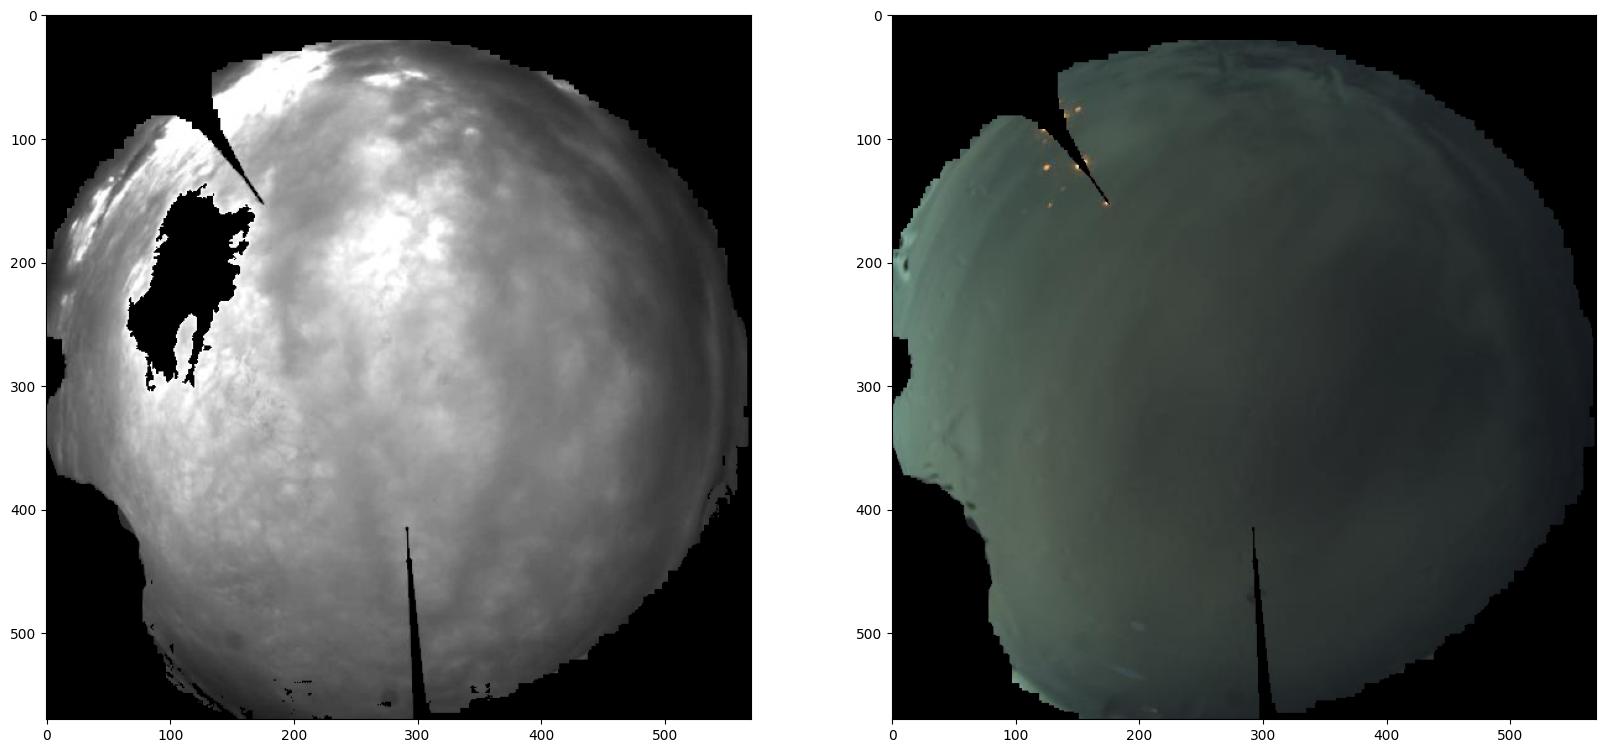

In [133]:

plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(masked[0],cmap='gray')
plt.subplot(1,2,2)
plt.imshow(images[0])

In [134]:
pd.value_counts(test['Label'])

Cloudy           226
Clear            211
Overcast          53
Mostly cloudy      9
Partly cloudy      1
Name: Label, dtype: int64

In [135]:
test

,contrast,dissimilarity,homogeneity,energy,correlation,ASM,intensity,Red channel,Blue channel,skewness,std,different(R-B),Label,Time
638585605457896851,174.489335,2.341862,0.630251,0.272096,0.984573,0.074036,117.187467,88.603019,117.187467,-94.968114,85.930828,-28.584448,Cloudy,2024-08-07 00:02:25.789688
638585608158481612,179.097752,2.202041,0.638868,0.275688,0.983786,0.076004,113.150452,86.774700,113.150452,-73.534915,85.015788,-26.375753,Cloudy,2024-08-07 00:06:55.848160
638585610859481657,152.266719,1.903133,0.666603,0.267350,0.985487,0.071476,106.702167,81.678310,106.702167,2.055945,81.380146,-25.023857,Overcast,2024-08-07 00:11:25.948168
638585613559331758,209.488145,1.943496,0.710159,0.287230,0.975177,0.082501,89.680459,67.684989,89.680459,155.533845,74.267071,-21.995469,Cloudy,2024-08-07 00:15:55.933176
638585616260082715,178.861345,1.806345,0.722795,0.286349,0.976034,0.081996,81.169378,61.491982,81.169378,257.621362,69.555147,-19.677396,Cloudy,2024-08-07 00:20:26.008272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638586455428164285,13.911979,0.417550,0.908559,0.255274,0.992680,0.065165,39.567328,39.957528,39.567328,-78.191683,27.774167,0.390200,Cloudy,2024-08-07 23:39:02.816432
638586458128154306,13.112506,0.413064,0.908053,0.256896,0.991782,0.065995,36.730277,35.224974,36.730277,-3.942536,26.207024,-1.505303,Cloudy,2024-08-07 23:43:32.815432
638586460828934996,13.037533,0.427771,0.899843,0.257423,0.990664,0.066267,36.306737,33.310323,36.306737,-12.390085,25.245546,-2.996414,Cloudy,2024-08-07 23:48:02.893496
638586463529595675,17.519930,0.513462,0.879342,0.256506,0.989654,0.065795,39.385734,35.775596,39.385734,64.065588,27.758317,-3.610139,Cloudy,2024-08-07 23:52:32.959568
